#Importing Required Libraries
* Imporitng the required libraries and mounting the drive to train and evaluate the model

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time
import shap

# Load Preprocessed Data

In [ ]:
X_train = np.load ("/content/drive/MyDrive/AI and Sus/X_train .npy")
X_val = np.load("/content/drive/MyDrive/AI and Sus/X_val.npy")
X_test = np.load("/content/drive/MyDrive/AI and Sus/X_test.npy")
y_train = np.load("/content/drive/MyDrive/AI and Sus/y_train.npy")
y_val = np.load("/content/drive/MyDrive/AI and Sus/y_val.npy")
y_test = np.load("/content/drive/MyDrive/AI and Sus/y_test.npy")

# encode labels


In [ ]:
num_classes = len(np.unique(y_train))
y_train_cat = to_categorical(y_train, num_classes)
y_val_cat = to_categorical(y_val, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

# Baseline MLP Model

In [ ]:
mlp_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')
])
mlp_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Train Model

In [ ]:
history = mlp_model.fit(X_train, y_train_cat, validation_data=(X_val, y_val_cat), epochs=50, batch_size=32)

Epoch 1/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6479 - loss: 1.0451 - val_accuracy: 0.9248 - val_loss: 0.2366
Epoch 2/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9061 - loss: 0.2583 - val_accuracy: 0.9573 - val_loss: 0.1501
Epoch 3/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9297 - loss: 0.1849 - val_accuracy: 0.9695 - val_loss: 0.1171
Epoch 4/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9392 - loss: 0.1563 - val_accuracy: 0.9679 - val_loss: 0.1025
Epoch 5/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9501 - loss: 0.1368 - val_accuracy: 0.9622 - val_loss: 0.0927
Epoch 6/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9537 - loss: 0.1174 - val_accuracy: 0.9789 - val_loss: 0.0754
Epoch 7/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9585 - loss: 0.1087 - val_accuracy: 0.9821 - val_loss: 0.0658
Epoch 8/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9626 - loss: 0.0963 - val_accuracy: 0.

#Evaluate on Test Data

In [ ]:
test_preds = mlp_model.predict(X_test)
predicted_classes = np.argmax(test_preds, axis=1)
print(" Classification Report:")
print(classification_report(y_test, predicted_classes))
print(" Confusion Matrix:")
print(confusion_matrix(y_test, predicted_classes))
print("Cohen Kappa Score:", cohen_kappa_score(y_test, predicted_classes))

77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1127
           1       0.67      0.89      0.76         9
           2       1.00      0.99      0.99      1044
           3       0.89      0.96      0.93       130
           4       0.92      0.98      0.95       129
           5       0.75      0.15      0.25        20

    accuracy                           0.98      2459
   macro avg       0.87      0.83      0.81      2459
weighted avg       0.98      0.98      0.98      2459

 Confusion Matrix:
[[1122    0    5    0    0    0]
 [   0    8    0    0    0    1]
 [   2    0 1036    0    6    0]
 [   0    0    0  125    5    0]
 [   0    0    0    2  127    0]
 [   0    4    0   13    0    3]]
Cohen Kappa Score: 0.9744480288022305


In [ ]:
X_explain = X_test[:5]  # Only 5 samples
shap_values = explainer.shap_values(X_explain)

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(5, 5))']
  warnings.warn(msg)


In [ ]:
X_explain = X_test[:100]
shap_values = explainer.shap_values(X_explain)

In [ ]:
print("SHAP shape:", shap_values[0].shape)
print("X_test shape:", X_test[:100].shape)

SHAP shape: (5, 6)
X_test shape: (100, 5)


In [ ]:
predicted_classes = np.argmax(test_preds, axis=1)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predicted_classes)
print(" Test Accuracy:", round(accuracy * 100, 2), "%")

 Test Accuracy: 98.45 %


#Model Accuracy

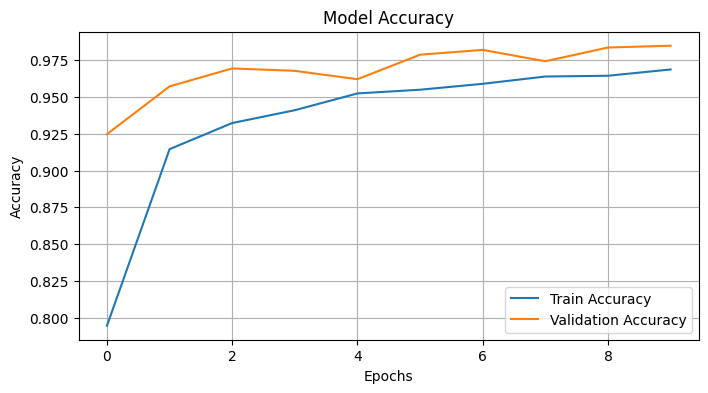

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()



#Model Loss

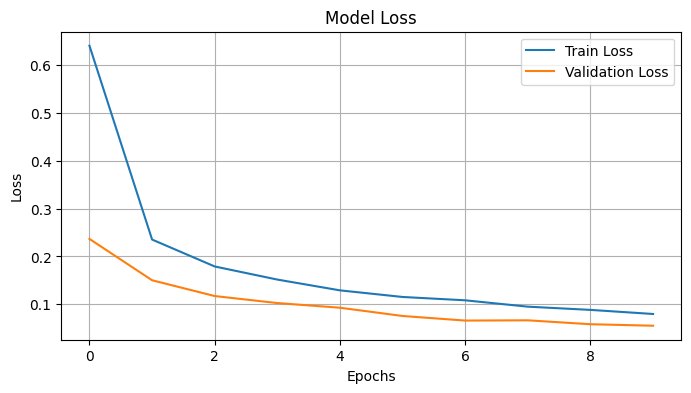

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


#Confusion Matrix

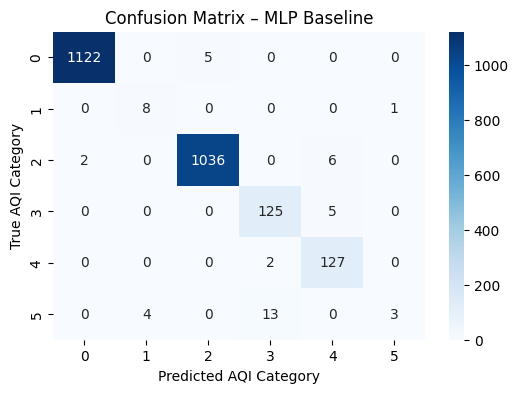

In [ ]:
#Confusion Matrix Heatmap
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix – MLP Baseline")
plt.xlabel("Predicted AQI Category")
plt.ylabel("True AQI Category")
plt.show()


In [ ]:
# Model Size
mlp_model.save("baseline_mlp_model.h5")
size_bytes = os.path.getsize("baseline_mlp_model.h5")
size_mb = size_bytes / (1024 * 1024)
print(" Saved model size:", round(size_mb, 2), "MB")



 Saved model size: 0.06 MB


In [ ]:
#  Save Model
mlp_model.save("baseline_mlp_model.h5")